<a href="https://colab.research.google.com/github/Rustam64/AI/blob/main/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
# Save datagenerators as file to colab working directory
# If you are using GitHub, make sure you get the "Raw" version of the code
url = 'https://raw.githubusercontent.com/NVDLI/LDL/main/pt_framework/utilities.py'
r = requests.get (url)
# make sure vour filename is the same as how you want to import
with open( 'utilities.py','w') as f:
    f.write(r.text)

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt
from utilities import train_model
device = torch. device("cuda:O" if torch.cuda. is_available() else "cpu")
EPOCHS = 100
BATCH_SIZE = 16

TRAIN_TEST_SPLIT = 0.8
MIN= 12
FILE_NAME = '/content/book_store_sales.csv'
def readfile(file_name) :
    file = open(file_name, 'r', encoding='utf-8')
    next (file)
    data = []
    for line in (file):
        values = line.split(',')
        data.append(float (values [1]))
    file.close()
    return np.array(data, dtype=np.float32)

# Read data and split up into train and test data.
sales = readfile(FILE_NAME)
months = len(sales)
split = int (months * TRAIN_TEST_SPLIT)
train_sales = sales[0:split]
test_sales = sales [split:]

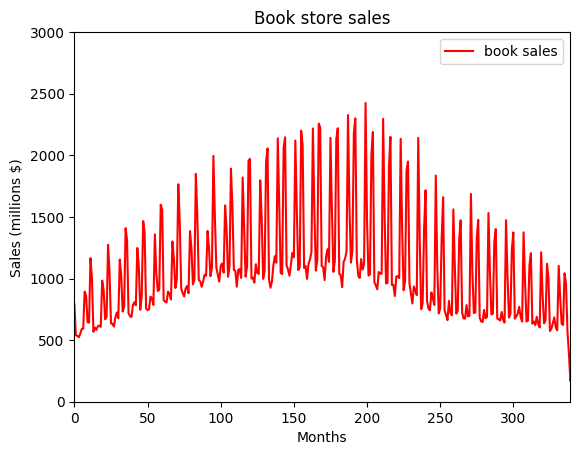

In [ ]:
x = range(len(sales))
plt.plot(x, sales, 'r-', label='book sales')
plt.title('Book store sales')
plt.axis([0, 339, 0.0, 3000.0])
plt.xlabel('Months')
plt.ylabel('Sales (millions $)')
plt.legend()
plt.show()

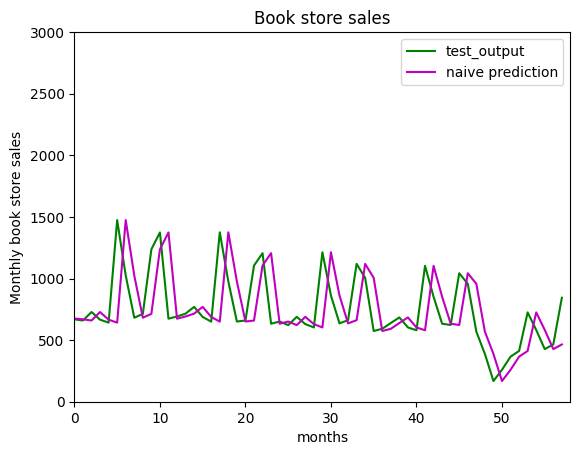

In [ ]:
test_output = test_sales[MIN:]
naive_prediction = test_sales [MIN-1:-1]
x = range(len(test_output))
plt.plot(x, test_output, 'g', label='test_output')
plt.plot(x, naive_prediction, 'm-', label='naive prediction')
plt.title('Book store sales')
plt.axis([0, len(test_output), 0.0, 3000.01])
plt.xlabel('months')
plt.ylabel('Monthly book store sales')
plt.legend()
plt.show()

In [ ]:
mean = np.mean(train_sales)
stddev = np.std(train_sales)
train_sales_std = (train_sales-mean)/stddev
test_sales_std = (test_sales-mean)/stddev

In [ ]:
# Create training examples.
train_months = len(train_sales)
train_x = np.zeros((train_months-MIN, train_months-1, 1), dtype=np.float32)
train_y = np.zeros((train_months-MIN, 1), dtype=np.float32)

for i in range(0, train_months-MIN):
  train_x[i,- (i+MIN) :, 0] = train_sales_std[0:i+MIN]
  train_y[i, 0] = train_sales_std[i+MIN]

# Create test examples.
test_months = len(test_sales)
test_x = np.zeros((test_months-MIN, test_months-1, 1), dtype=np.float32)
test_y = np.zeros((test_months-MIN, 1), dtype=np.float32)

for i in range(0, test_months-MIN) :
  test_x[i, - (i+MIN):, 0] = test_sales_std[0: i+MIN]
  test_y[i, 0] = test_sales_std[i+MIN]

trainset = TensorDataset(torch.from_numpy(train_x).clone(), torch.from_numpy(train_y))
testset = TensorDataset(torch.from_numpy(test_x).clone(), torch.from_numpy(test_y))

In [ ]:
class LastTimestep(nn.Module):
  def forward(self, inputs):
    return inputs[1][0]

# Create RNN model
model = nn.Sequential(
    nn.RNN(1, 128, nonlinearity='relu', batch_first=True),
    LastTimestep(),
    nn.Linear(128,1)
)

# Loss function and optimizer
optimizer = torch.optim.Adam(model.parameters())
loss_function = nn.MSELoss()

# Train model
train_model(model, device, EPOCHS, BATCH_SIZE, trainset, testset, optimizer, loss_function, 'mae')

Epoch 1/100 loss: 0.9140 - mae: 0.7239 - val_loss: 1.1269 - val_mae: 0.8289
Epoch 2/100 loss: 0.8019 - mae: 0.6409 - val_loss: 0.6943 - val_mae: 0.6519
Epoch 3/100 loss: 0.8757 - mae: 0.6122 - val_loss: 1.2079 - val_mae: 0.8827
Epoch 4/100 loss: 0.7258 - mae: 0.6624 - val_loss: 1.2548 - val_mae: 0.8934
Epoch 5/100 loss: 0.6211 - mae: 0.5875 - val_loss: 0.7887 - val_mae: 0.6599
Epoch 6/100 loss: 0.5442 - mae: 0.5566 - val_loss: 0.5249 - val_mae: 0.4917
Epoch 7/100 loss: 0.4826 - mae: 0.4996 - val_loss: 0.3795 - val_mae: 0.3723
Epoch 8/100 loss: 0.4606 - mae: 0.4745 - val_loss: 0.3336 - val_mae: 0.3633
Epoch 9/100 loss: 0.4362 - mae: 0.4737 - val_loss: 0.3668 - val_mae: 0.3911
Epoch 10/100 loss: 0.4194 - mae: 0.4759 - val_loss: 0.2681 - val_mae: 0.3234
Epoch 11/100 loss: 0.3995 - mae: 0.4646 - val_loss: 0.3267 - val_mae: 0.3393
Epoch 12/100 loss: 0.4441 - mae: 0.4850 - val_loss: 0.2531 - val_mae: 0.3267
Epoch 13/100 loss: 0.4192 - mae: 0.4753 - val_loss: 0.3454 - val_mae: 0.4196
Epoch 14

[0.0986275030847858, 0.1469142846763134]

In [ ]:
test_output = test_sales_std[MIN:]
naive_prediction = test_sales_std[MIN-1:-1]
mean_square_error = np.mean(np.square(naive_prediction-test_output))
mean_abs_error=np.mean(np.abs(naive_prediction-test_output))

print('Naive test MSE: ', mean_square_error)
print('Naive test mean abs: ', mean_abs_error)

Naive test MSE:  0.4723033
Naive test mean abs:  0.48052385


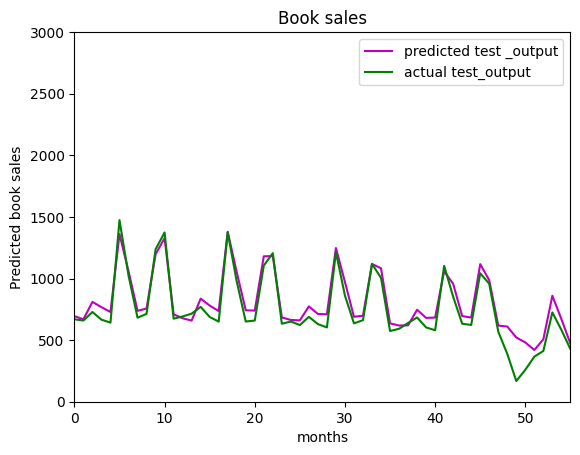

In [ ]:
inputs = torch.from_numpy(test_x)
inputs = inputs.to(device)
outputs = model(inputs)
predicted_test = outputs.cpu().detach().numpy()

# De-standardize output
predicted_test = np.reshape(predicted_test,(len(predicted_test)))
predicted_test = predicted_test * stddev + mean

x = range(len(test_sales) -MIN)
plt.plot(x, predicted_test,'m-', label='predicted test _output')
plt.plot(x, test_sales[-(len (test_sales)-MIN) :], 'g-', label='actual test_output')
plt.title('Book sales')
plt.axis([0, 55, 0.0, 3000.0])
plt.xlabel('months')
plt.ylabel('Predicted book sales')
plt.legend()
plt.show ()